https://www.kaggle.com/code/jocelynallen/starter-european-soccer-database-5bfba1ad-d/data

ANOVA Analysis
Hypothesis:

First, we get the height threshold/groups (taller than 185cm, 180-185cm, lower than 180cm) 

1. Test if there is significant difference in the heading_accuracy accross heights?(mean heading_accuracy)

Null hypothesis: Mean_heading_accuracy among three height categories/groups is the same
Alternative Hypothesis: There is one height group is significantly different as other two categories

2. Test if there is significant difference in the ball control based on height?

Null hypothesis: Mean_ball_control among three height categories/groups is the same
Alternative Hypothesis: There is one height group is significantly different as other two categories


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import sqlite3
import warnings
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

cnn = sqlite3.connect('/Users/JamesJin/Downloads/Waterloo Data science certificate courses/Statistics for data science/group-assignment.html/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player", cnn)
df.to_csv('player.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [4]:
df1 = pd.read_sql_query("SELECT * FROM Player_Attributes", cnn)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [5]:
df1.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
players = pd.merge(df,df1,on='player_api_id',how= 'left')
players= players[['height','ball_control','heading_accuracy','player_api_id']]
players.head()
players = players.dropna()
players = players.drop_duplicates(subset ='player_api_id', keep = 'first')
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 183968
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            11060 non-null  float64
 1   ball_control      11060 non-null  float64
 2   heading_accuracy  11060 non-null  float64
 3   player_api_id     11060 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 432.0 KB


In [7]:
players. describe()

,height,ball_control,heading_accuracy,player_api_id
count,11060.000000,11060.000000,11060.000000,11060.000000
mean,181.867445,62.099005,56.797468,156582.427215
std,6.369201,15.309941,16.709716,160713.700624
min,157.480000,9.000000,7.000000,2625.000000
25%,177.800000,58.000000,50.000000,35555.500000
50%,182.880000,65.000000,60.000000,96619.500000
75%,185.420000,72.000000,68.000000,212470.500000
max,208.280000,96.000000,95.000000,750584.000000


In [8]:
# add height groups
players['height_category'] = np.where(players['height']<180, 'lower than 180cm',
              np.where(players['height']<185, '180-185cm',
              np.where(players['height']<210, 'higher than 185cm','higher than 185cm')))
players.info()
players.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 183968
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            11060 non-null  float64
 1   ball_control      11060 non-null  float64
 2   heading_accuracy  11060 non-null  float64
 3   player_api_id     11060 non-null  int64  
 4   height_category   11060 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 518.4+ KB


,height,ball_control,heading_accuracy,player_api_id,height_category
0,182.88,49.0,71.0,505942,180-185cm
5,170.18,71.0,58.0,155782,lower than 180cm
38,170.18,67.0,60.0,162549,lower than 180cm


(array([ 561.,  222.,  309.,  565., 1234., 2479., 3112., 1974.,  556.,
          48.]),
 array([ 7. , 15.8, 24.6, 33.4, 42.2, 51. , 59.8, 68.6, 77.4, 86.2, 95. ]),
 <BarContainer object of 10 artists>)

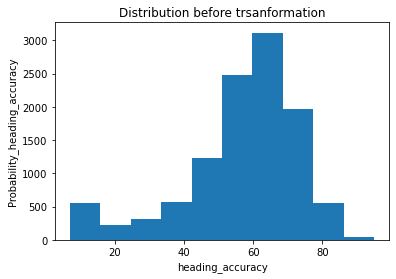

In [15]:
# check normality of data
fig, ax = plt.subplots(1, 1)
# Set title
ax.set_title("Distribution before trsanformation")
  
# adding labels
ax.set_xlabel('heading_accuracy')
ax.set_ylabel('Probability_heading_accuracy')
plt.hist(players['heading_accuracy'])

Best lambda parameter = 1.904


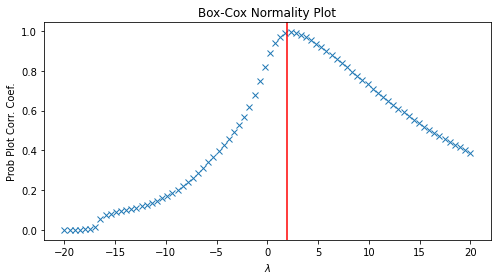

In [10]:
# transfrom non_normal distribution to the normal distribution (heading_accuracy)

players_trans, lmbda = stats.boxcox(players['heading_accuracy'])
print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(players['heading_accuracy'], -20, 20, plot=ax)
ax.axvline(lmbda, color='r');


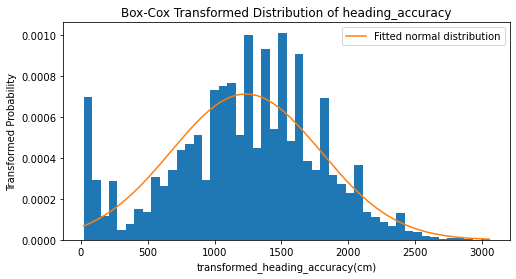

In [11]:
# fit Normal distribution
players_trans.sort()
mean,std = stats.norm.fit(players_trans, loc=0)
pdf_norm = stats.norm.pdf(players_trans, mean, std)

# visual inspection
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(players_trans, bins='auto', density=True)
ax.plot(players_trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('transformed_heading_accuracy(cm)')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of heading_accuracy')
ax.legend();


(array([ 156.,  638.,  217.,  146.,  657., 2057., 3457., 2985.,  709.,
          38.]),
 array([ 9. , 17.7, 26.4, 35.1, 43.8, 52.5, 61.2, 69.9, 78.6, 87.3, 96. ]),
 <BarContainer object of 10 artists>)

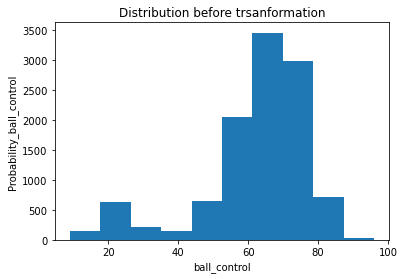

In [14]:
fig, ax = plt.subplots(1, 1)
# Set title
ax.set_title("Distribution before trsanformation")
  
# adding labels
ax.set_xlabel('ball_control')
ax.set_ylabel('Probability_ball_control')
plt.hist(players['ball_control'])

Best lambda parameter = 2.539


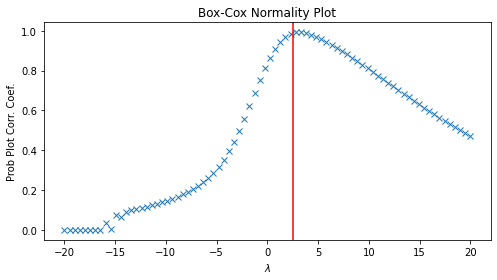

In [17]:
# transfrom non_normal distribution to the normal distribution (ball_control)

players_trans1, lmbda = stats.boxcox(players['ball_control'])
print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(players['ball_control'], -20, 20, plot=ax)
ax.axvline(lmbda, color='r');

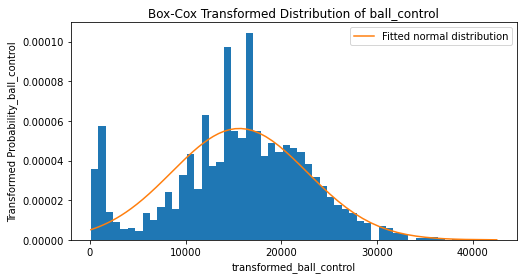

In [18]:
# fit Normal distribution
players_trans1.sort()
mean,std = stats.norm.fit(players_trans1, loc=0)
pdf_norm = stats.norm.pdf(players_trans1, mean, std)

# visual inspection
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(players_trans1, bins='auto', density=True)
ax.plot(players_trans1, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('transformed_ball_control')
ax.set_ylabel('Transformed Probability_ball_control')
ax.set_title('Box-Cox Transformed Distribution of ball_control')
ax.legend();

In [19]:
players['trans_heading_accuracy']=players_trans.tolist()
players['trans_ball_control']= players_trans1.tolist()
transformed_df = players
transformed_df['height_category'] = np.where(players['height']<180, 'lower than 180cm',
              np.where(players['height']<185, '180-185cm',
              np.where(players['height']<210, 'higher than 185cm','higher than 185cm')))
transformed_df.info()
transformed_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 183968
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   height                  11060 non-null  float64
 1   ball_control            11060 non-null  float64
 2   heading_accuracy        11060 non-null  float64
 3   player_api_id           11060 non-null  int64  
 4   height_category         11060 non-null  object 
 5   trans_heading_accuracy  11060 non-null  float64
 6   trans_ball_control      11060 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 691.2+ KB


,height,ball_control,heading_accuracy,player_api_id,height_category,trans_heading_accuracy,trans_ball_control
0,182.88,49.0,71.0,505942,180-185cm,20.810978,103.895758
5,170.18,71.0,58.0,155782,lower than 180cm,26.985875,135.883626
38,170.18,67.0,60.0,162549,lower than 180cm,26.985875,135.883626
64,182.88,62.0,68.0,30572,180-185cm,26.985875,135.883626
87,182.88,58.0,73.0,23780,180-185cm,26.985875,135.883626


<Figure size 1440x504 with 0 Axes>

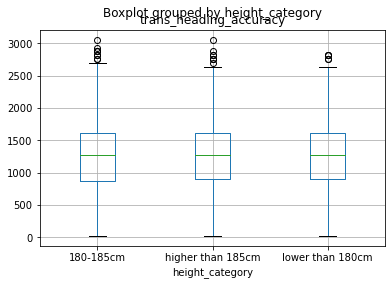

In [20]:
# boxplot heading accuracy
fig = plt.figure(figsize =(20, 7))
boxplot = transformed_df.boxplot('trans_heading_accuracy', by='height_category')


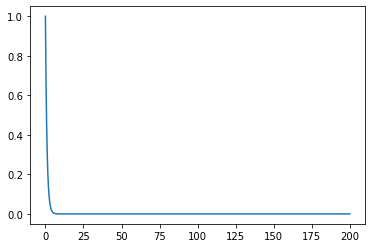

In [21]:
import scipy.stats as st
dfg = 3 - 1
dfe = 11060 - 3

F_dist = st.f(dfg, dfe)
x = np.linspace(0, 200, 10000)

plt.plot(x, F_dist.pdf(x))

In [22]:
transformed_df.describe()

,height,ball_control,heading_accuracy,player_api_id,trans_heading_accuracy,trans_ball_control
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,181.867445,62.099005,56.797468,156582.427215,1233.982444,15616.033705
std,6.369201,15.309941,16.709716,160713.700624,559.949722,7097.662241
min,157.480000,9.000000,7.000000,2625.000000,20.810978,103.895758
25%,177.800000,58.000000,50.000000,35555.500000,900.015902,11825.871358
50%,182.880000,65.000000,60.000000,96619.500000,1273.648604,15793.751458
75%,185.420000,72.000000,68.000000,212470.500000,1616.441110,20477.296588
max,208.280000,96.000000,95.000000,750584.000000,3055.266725,42511.798309


In [23]:
transformed_df.groupby('height_category')['trans_heading_accuracy'].describe()

,count,mean,std,min,25%,50%,75%,max
height_category,,,,,,,,
180-185cm,3342.0,1215.276823,569.242122,20.810978,866.041452,1273.648604,1616.44111,3055.266725
higher than 185cm,3916.0,1248.370614,548.263634,26.985875,900.015902,1273.648604,1616.44111,3055.266725
lower than 180cm,3802.0,1235.605302,563.294913,26.985875,900.015902,1273.648604,1616.44111,2815.012408


In [24]:
len(transformed_df[(transformed_df['height']>=180)&(players['height']<185)])

3342

In [25]:
len(transformed_df[transformed_df['height']>=185])


3916

In [26]:
len(transformed_df[transformed_df['height']<180])

3802

In [27]:
# calculate MSG and MSE and find the F-statistic

means = [1215.27, 1248.37, 1235.60]
MSG = (1/2)*(3342*(1215.27-1233.98)**2+3916*(1248.37-1233.98)**2+3802*(1235.60-1233.98)**2)
MSE = (1/(11060-3))*((3342-1)*569.24**2+(3916-1)*548.26**2 + (3802-1)*563.29**2)

F = MSG/MSE

p_value = 1 - F_dist.cdf(F)

print('F-statistic: ', F)
print('p-value is ', p_value)

F-statistic:  3.1759452773569548
p-value is  0.04179270871177054


In [28]:
import scipy.stats as st
st.f_oneway(transformed_df['trans_heading_accuracy'][transformed_df['height_category'] == 'lower than 180cm'],
            transformed_df['trans_heading_accuracy'][transformed_df['height_category'] == '180-185cm'], 
            transformed_df['trans_heading_accuracy'][transformed_df['height_category'] == 'higher than 185cm'])

F_onewayResult(statistic=3.174757930471673, pvalue=0.04184233210682352)

In [29]:
transformed_df.groupby('height_category')['trans_ball_control'].describe()

,count,mean,std,min,25%,50%,75%,max
height_category,,,,,,,,
180-185cm,3342.0,15377.416675,7223.780612,103.895758,11314.993007,15793.751458,20477.296588,42511.798309
higher than 185cm,3916.0,15796.220066,6931.292388,173.196042,11825.871358,16418.045119,20477.296588,39219.246148
lower than 180cm,3802.0,15640.191602,7150.916566,135.883626,11825.871358,15793.751458,20477.296588,37112.985746


In [30]:
import scipy.stats as st
st.f_oneway(transformed_df['trans_ball_control'][transformed_df['height_category'] == 'lower than 180cm'],
            transformed_df['trans_ball_control'][transformed_df['height_category'] == '180-185cm'], 
            transformed_df['trans_ball_control'][transformed_df['height_category'] == 'higher than 185cm'])

F_onewayResult(statistic=3.1738102967559554, pvalue=0.041881979329898615)

we find a large F-value for both heading_accuracy and a small p-value of 0.041, smaller than the significance level 0.05. Thus, the null hypothesis can be rejected and we conclude that at least one group is different from the rest.

In [31]:
# Find which group is significantly different from other groups_heading accuracy

In [32]:
import statsmodels.stats.multicomp as mc
comparisons = mc.MultiComparison(transformed_df['trans_heading_accuracy'],transformed_df['height_category'])
table1, arr1, arr2 = comparisons.allpairtest(st.ttest_ind,method= 'bonf')
table1

group1,group2,stat,pval,pval_corr,reject
180-185cm,higher than 185cm,-2.5183,0.0118,0.0354,True
180-185cm,lower than 180cm,-1.5145,0.1299,0.3898,False
higher than 185cm,lower than 180cm,1.0089,0.3131,0.9392,False


From the above table, we can see that the heading accuracy of soccer ball players with height between 180-185cm is significantly less than players higher than 185cm, but there is no significant difference between players higher than 185cm or shorter than 180cm

From the above table, we can see that the ball control of soccer ball players with height between 180-185cm is significantly  lower than those players higher than 185cm, and there are no significant difference between other groups

In [33]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=transformed_df, res_var='trans_ball_control', anova_model='trans_ball_control ~ C(height_category)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(height_category),2.0,3.196472e+08,1.598236e+08,3.17381,0.041882
Residual,11057.0,5.567975e+11,5.035701e+07,NaN,NaN


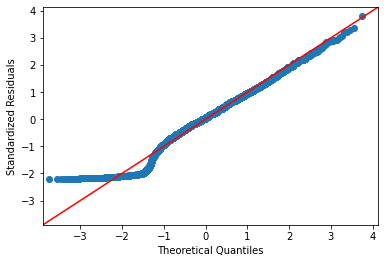

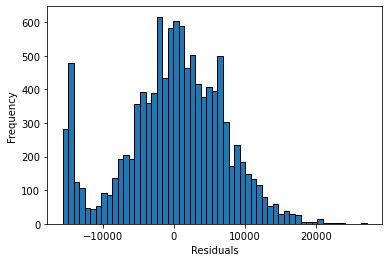

In [35]:
# DOUBLE CHECK ANOVA Assumption_Normality
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

Therefore our data is drawn from normal distribution

# **3. Correlations between weight and balance of European Soccer Players: if heavier players will have significantly greater balance.**

---

Weight Groups:
1. Less than 163 lbs
2. Between 163 and 175 lbs
3. More than 175 lbs

**Null hypothesis**: Mean of balance for all three weight groups is the same

**Alternative hypothesis**: One of the group weight mean is significantly different from the other groups


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 14
from google.colab import drive
drive.mount('/content/drive')

df_players=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/UwaterlooDataScienceCertificate_2_Statistics/player.csv') 
df_players

print('Groups division:')
print('Max weight:', df_players['weight'].max())
print('Min weight:', df_players['weight'].min())
print('Median weight:', df_players['weight'].median())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Groups division:
Max weight: 243
Min weight: 117
Median weight: 168.0


In [ ]:
df_attributes=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/UwaterlooDataScienceCertificate_2_Statistics/player_attributes.csv') 
df_attributes.info()
df_attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           183978 non-null  int64  
 1   id                   183978 non-null  int64  
 2   player_fifa_api_id   183978 non-null  int64  
 3   player_api_id        183978 non-null  int64  
 4   date                 183978 non-null  object 
 5   overall_rating       183142 non-null  float64
 6   potential            183142 non-null  float64
 7   preferred_foot       183142 non-null  object 
 8   attacking_work_rate  180748 non-null  object 
 9   defensive_work_rate  183142 non-null  object 
 10  crossing             183142 non-null  float64
 11  finishing            183142 non-null  float64
 12  heading_accuracy     183142 non-null  float64
 13  short_passing        183142 non-null  float64
 14  volleys              181265 non-null  float64
 15  dribbling        

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [ ]:
merged_df_players = df_players.merge(df_attributes.drop_duplicates('player_api_id'), how='left', on='player_api_id')
merged_df_players=merged_df_players.dropna()
merged_df_players[['weight','balance']].describe()

,weight,balance
count,10410.000000,10410.000000
mean,168.411239,63.704707
std,15.026311,13.593696
min,117.000000,12.000000
25%,159.000000,56.000000
50%,168.000000,65.000000
75%,179.000000,73.000000
max,243.000000,96.000000


## **Normal Distribution Validation and Box-Cox Tranform**

---

- Weight: linear
- Balance: linear

In [ ]:
def plot_results(df, y):

  fig = plt.figure(figsize=(12,5))

  ax1 = fig.add_subplot(1,2,1)
  df[y].hist()

  ax2 = fig.add_subplot(1,2,2)
  stats.probplot(df[y], dist='norm', plot=plt)

  plt.show()

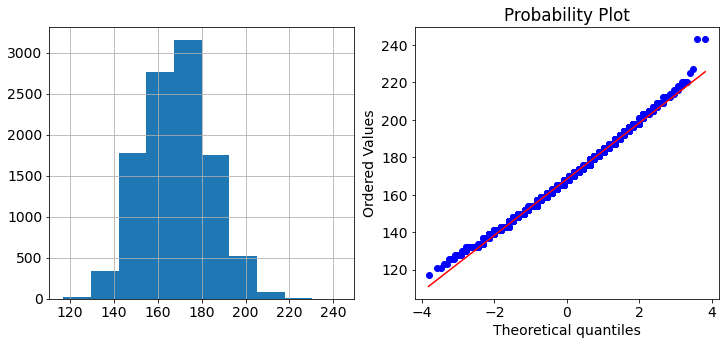

In [ ]:
plot_results(merged_df_players, 'weight')

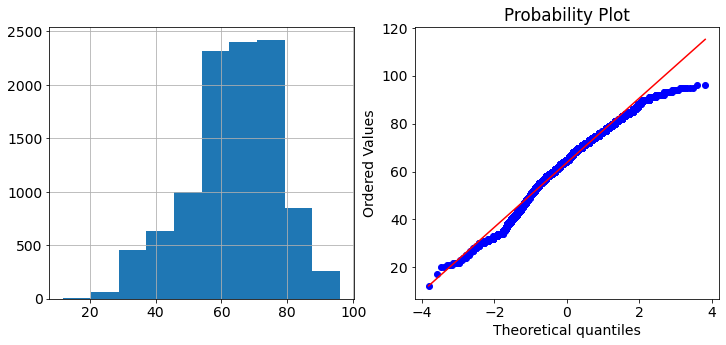

In [ ]:
plot_results(merged_df_players, 'balance')

Set 3 - Optimal Lambda:  1.688486524319338


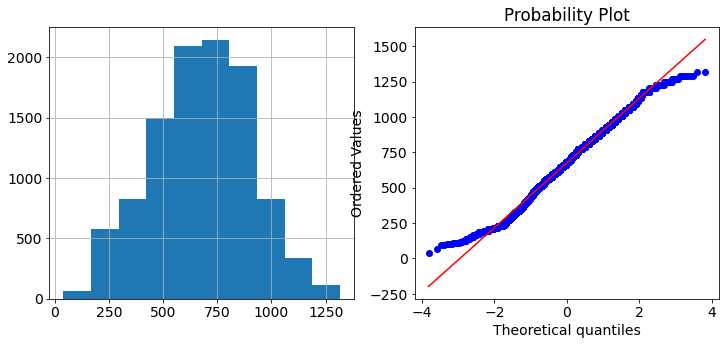

In [ ]:
#Transform Balance non linear data
merged_df_players_3 = pd.DataFrame()
merged_df_players_3['weight'] = merged_df_players['weight'].values
merged_df_players_3['balance'], optimal_lambda = stats.boxcox(merged_df_players['balance'].values, lmbda=None)
print('Set 3 - Optimal Lambda: ', optimal_lambda)

plot_results(merged_df_players_3, 'balance')

## **Group division**

---

In [ ]:
len_g1=len(merged_df_players_3[merged_df_players_3['weight']<163])
print('Groupe 1:', len_g1)

len_g2=len(merged_df_players_3[(merged_df_players_3['weight']>=163)&(merged_df_players_3['weight']<=175)])
print('Groupe 2:', len_g2)

len_g3=len(merged_df_players_3[merged_df_players_3['weight']>175])
print('Groupe 3:', len_g3)

Groupe 1: 3597
Groupe 2: 3450
Groupe 3: 3363


In [ ]:
merged_df_players_3['weight_categories'] = np.where(merged_df_players_3['weight']<163, '1',
              np.where((merged_df_players_3['weight']>=163)&(merged_df_players_3['weight']<=175), '2',
              np.where(merged_df_players_3['weight']>175, '3', '3')))

merged_df_players_3.groupby('weight_categories').describe()

weight                                                    \
                    count        mean       std    min    25%    50%    75%   
weight_categories                                                             
1                  3597.0  152.619127  7.360762  117.0  148.0  154.0  159.0   
2                  3450.0  168.366087  3.742999  163.0  165.0  168.0  172.0   
3                  3363.0  185.348498  8.541489  176.0  179.0  183.0  190.0   

                         balance                                      \
                     max   count        mean         std         min   
weight_categories                                                      
1                  161.0  3597.0  851.796608  174.959157  163.848423   
2                  174.0  3450.0  673.953839  164.738942  108.844962   
3                  243.0  3363.0  490.142402  185.637181   38.734262   

                                                                    
                          25%         50%         75%          max  
weight_categories                                                   
1                  753.412902  847.952933  967.338307  1316.270966  
2                  578.252584  681.090298  790.682264  1247.536348  
3                  352.144008  497.862711  611.769100  1224.959588

In [ ]:
# to remove
len_g1=len(merged_df_players_3[merged_df_players_3['weight_categories']=='1'])
print('Groupe 1:', len_g1)

len_g2=len(merged_df_players_3[merged_df_players_3['weight_categories']=='2'])
print('Groupe 2:', len_g2)

len_g3=len(merged_df_players_3[merged_df_players_3['weight_categories']=='3'])
print('Groupe 3:', len_g3)

Groupe 1: 3597
Groupe 2: 3450
Groupe 3: 3363


In [ ]:
merged_df_players_3[['weight', 'balance']].describe()

,weight,balance
count,10410.000000,10410.000000
mean,168.411239,676.023251
std,15.026311,229.214757
min,117.000000,38.734262
25%,159.000000,529.430279
50%,168.000000,681.090298
75%,179.000000,828.681547
max,243.000000,1316.270966


In [ ]:
merged_df_players_3.groupby('weight_categories')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
weight_categories,,,,,,,,
1,3597.0,851.796608,174.959157,163.848423,753.412902,847.952933,967.338307,1316.270966
2,3450.0,673.953839,164.738942,108.844962,578.252584,681.090298,790.682264,1247.536348
3,3363.0,490.142402,185.637181,38.734262,352.144008,497.862711,611.769100,1224.959588


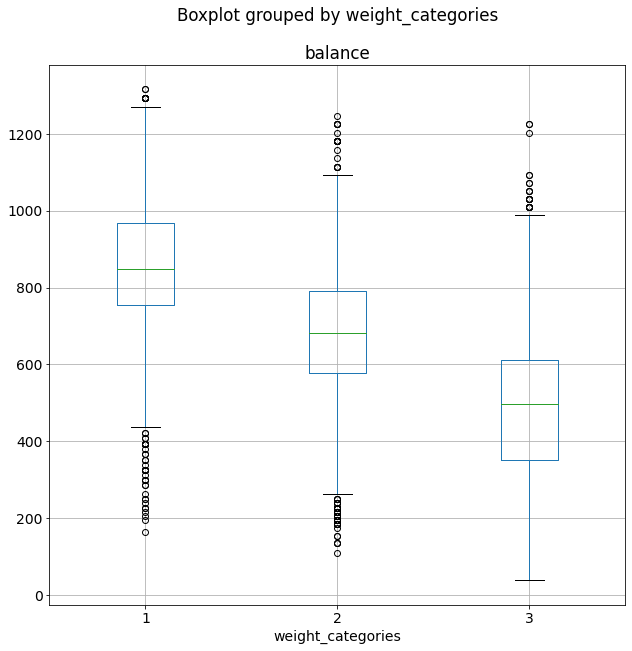

In [ ]:
merged_df_players_3.boxplot('balance', by='weight_categories',  figsize=(10,10))
None

## **Analysis of variance and the F-test**

---

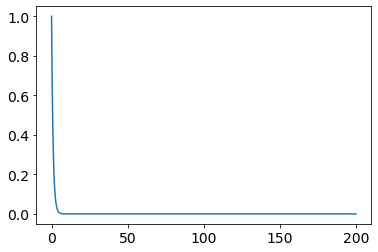

In [ ]:
dfg = 3 - 1
dfe = 10410 - 3
F_dist = stats.f(dfg, dfe)
x = np.linspace(0, 200, 10000)
plt.plot(x, F_dist.pdf(x))
None

In [ ]:
merged_df_players_3['balance'].describe()

count    10410.000000
mean       676.023251
std        229.214757
min         38.734262
25%        529.430279
50%        681.090298
75%        828.681547
max       1316.270966
Name: balance, dtype: float64

In [ ]:
merged_df_players_3.groupby('weight_categories')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
weight_categories,,,,,,,,
1,3597.0,851.796608,174.959157,163.848423,753.412902,847.952933,967.338307,1316.270966
2,3450.0,673.953839,164.738942,108.844962,578.252584,681.090298,790.682264,1247.536348
3,3363.0,490.142402,185.637181,38.734262,352.144008,497.862711,611.769100,1224.959588


In [ ]:
group1=merged_df_players_3['balance'][merged_df_players_3['weight_categories']=='1']
group2=merged_df_players_3['balance'][merged_df_players_3['weight_categories']=='2']
group3=merged_df_players_3['balance'][merged_df_players_3['weight_categories']=='3']
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3702.219683781715, pvalue=0.0)

In [ ]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3702.219683781715, pvalue=0.0)

## **Identification of the different group**

---

In [ ]:
comparisons = mc.MultiComparison(merged_df_players_3['balance'], merged_df_players_3['weight_categories'])
table, arr1, arr2 = comparisons.allpairtest(stats.ttest_ind,  method='bonf')
table

group1,group2,stat,pval,pval_corr,reject
1,2,43.8917,0.0,0.0,True
1,3,83.6707,0.0,0.0,True
2,3,43.2544,0.0,0.0,True


## **Observations**

---

At first, with the boxplot and tables, we can observe that the mean of balance is comparable in the first (less than 163) and second group (between 163 an 175), but this mean is higher for the third group (greater than 175). 

To confirm this obversation, we did apply the analysis of variance with the F-test. As we can see that P-value is 0.0, which is less than 0.5. We can conclude at least one of the groups has a higher/different mean of balance from the rest. That means we reject the null hypothesis which was stating all groups has the same mean, and we accept the alternative hypothesis.

With the Bonferroni correction method, we can observe there is no P-value correction since all P-value are 0.0. Following these P-value correction, all hypothesis are rejected. The only difference we can see is the higher number of the stat value (test statistic value, which is t statistic in this case) of group 1 and 3 comparision. Only groups differing significantly are those ligther than 163 lbs and those heavier than 175 lbs.


In [1]:
import sqlite3

import itertools
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import math

import seaborn as sns
import scipy.stats as stats

import statsmodels.stats.multicomp as mc
import statsmodels.api as sm


In [2]:
con = sqlite3.connect("database.sqlite")
df_player = pd.read_sql_query("SELECT * from Player", con)
df_player_att = pd.read_sql_query("SELECT * from Player_Attributes", con)

con.close()

In [3]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
df_player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df = df_player.merge(df_player_att.drop_duplicates('player_api_id'), how='left', on='player_api_id')
#Merged in such a way that we only have one entry per player

In [6]:
df.describe()

,id_x,player_api_id,player_fifa_api_id_x,height,weight,id_y,player_fifa_api_id_y,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,10582.000000,11060.000000,10582.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,10582.000000,11060.000000,10582.000000,11060.000000,10582.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,10582.000000,11060.000000,11060.000000,11060.000000,10582.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289,92269.333454,165664.910488,67.961935,71.037432,53.977939,48.168716,56.797468,61.785895,47.820450,57.748192,51.888301,48.195660,56.334539,62.099005,64.765642,65.143761,64.177660,65.420344,63.718579,60.938427,66.395672,64.603436,68.196383,52.043761,61.008951,51.046655,53.351899,56.283784,53.451808,47.082369,50.550452,48.068513,15.510669,15.722333,16.878391,15.874593,16.090687
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217,53213.841703,58649.928360,6.316694,6.214862,17.466495,18.959237,16.709716,13.814418,18.013271,17.749173,18.316738,17.857927,14.361713,15.309941,14.044542,13.750589,13.799563,8.352012,13.544272,16.426297,11.403024,14.264361,11.579763,18.434441,16.254977,19.898426,19.041354,14.551139,15.890658,21.598650,21.721379,21.728770,17.052335,16.112909,17.576813,16.533129,17.395060
min,1.000000,2625.000000,2.000000,157.480000,117.000000,1.000000,2.000000,42.000000,49.000000,6.000000,3.000000,7.000000,10.000000,5.000000,6.000000,6.000000,4.000000,10.000000,9.000000,13.000000,12.000000,16.000000,24.000000,12.000000,6.000000,21.000000,10.000000,21.000000,6.000000,11.000000,6.000000,3.000000,3.000000,7.000000,3.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000,46165.000000,151889.500000,64.000000,67.000000,44.000000,33.000000,50.000000,57.000000,34.000000,50.000000,40.000000,35.000000,49.000000,58.000000,55.000000,56.000000,56.000000,60.000000,56.000000,54.000000,60.000000,58.000000,61.000000,40.000000,52.000000,32.000000,41.000000,47.000000,44.000000,25.000000,29.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000,92063.500000,184671.000000,68.000000,71.000000,58.000000,51.000000,60.000000,64.000000,50.000000,62.000000,54.000000,49.000000,59.000000,65.000000,67.000000,67.000000,66.000000,66.000000,65.000000,65.000000,67.000000,67.000000,69.000000,57.000000,64.000000,56.000000,58.000000,58.000000,55.000000,53.000000,58.000000,55.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000,138843.500000,203883.250000,72.000000,75.000000,67.000000,64.000000,68.000000,71.000000,62.000000,70.000000,66.000000,62.000000,66.000000,72.000000,75.000000,75.000000,74.000000,71.000000,73.000000,72.000000,74.000000,74.000000,76.000000,66.000000,73.000000,68.000000,67.000000,67.000000,65.000000,66.000000,69.000000,67.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000,183969.000000,234141.000000,94.000000,94.000000,92.000000,95.000000,95.000000,93.000000,92.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,95.000000,92.000000,96.000000,95.000000,95.000000,95.000000,96.000000,93.000000,94.000000,95.000000,96.000000,94.000000,96.000000,90

### Hypotheses
1.	Taller players will have significantly greater heading accuracy 
2.	Shorter players will have significantly greater ball control based
3.	Heavier players will have significantly greater balance 
4.	Age will have a significant effect on the overall player rating
5.	Heavier players will have significantly greater  free kick accuracy 
6.	Taller players will have significantly greater sprint speed 


#### Hypothesis 4: Age will have a significant effect on the overall player rating

In [7]:
#generate ages
df["age"] = (pd.to_datetime(df['date']) - pd.to_datetime(df['birthday'])) / np.timedelta64(1, 'Y')
df['age'] = df['age'].apply(lambda x: math.floor(float(x)))
df['age'].min(), df['age'].max()

(17, 43)

In [8]:
stats.spearmanr(df['age'], df['overall_rating']) 

SpearmanrResult(correlation=0.19667013461161423, pvalue=7.321089352683247e-97)

##### Correlation Age and Overall Rating
the spearman correlation is a weak positive correlation. As age increases, overall player rating increases

p-value is less than 0.05 therefore there is a significant postitive relationship between age and overall player rating.

<AxesSubplot:xlabel='age', ylabel='overall_rating'>

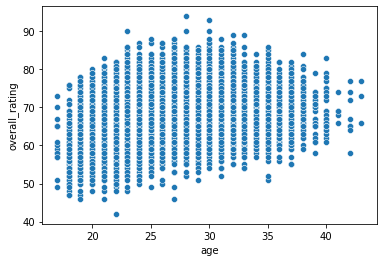

In [9]:
sns.scatterplot(data=df, x="age", y="overall_rating")

Group the ages so that we have groups to consider for ANOVA

- 1: 17-24
- 2: 25-29
- 3: 30-34
- 4: 35-39
- 5: 40-44

In [10]:
is_age1 = df['age'].apply(lambda x: x <= 24) 
age1 = df[is_age1]
age1['age_group']='17-24'

is_age2 = df['age'].apply(lambda x: x > 24 and x <= 29) 
age2 = df[is_age2]
age2['age_group']='25-29'

is_age3 = df['age'].apply(lambda x: x > 30 and x <= 34) 
age3 = df[is_age3]
age3['age_group']='30-34'

is_age4 = df['age'].apply(lambda x: x > 34) 
age4 = df[is_age4]
age4['age_group']='35-39'

is_age5 = df['age'].apply(lambda x: x > 40 and x <= 44) 
age5 = df[is_age5]
age5['age_group']='40-44'

##### Degrees of Freedom

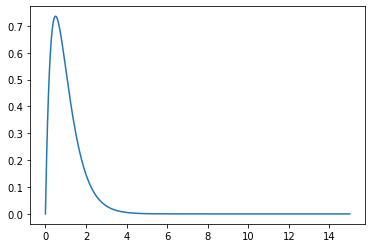

In [11]:
dfg = 5 - 1
dfe = 11060 - 5

F_dist = stats.f(dfg, dfe)
x = np.linspace(0, 15, 1000)

plt.plot(x, F_dist.pdf(x))

In [12]:
pdList = [age1,age2,age3,age4,age5]
new_df = pd.concat(pdList)
new_df.groupby('age_group')['overall_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
17-24,3288.0,65.723540,6.810926,42.0,61.00,65.0,70.00,90.0
25-29,4023.0,68.954014,6.096369,46.0,65.00,69.0,73.00,94.0
30-34,2264.0,68.664311,5.487658,52.0,65.00,68.0,72.00,89.0
35-39,818.0,68.850856,5.470272,51.0,65.00,69.0,73.00,86.0
40-44,16.0,69.000000,5.189733,58.0,65.75,68.5,73.25,77.0


In [13]:
#Not enough observations in final age range, combine it with previous range
is_age4 = df['age'].apply(lambda x: x > 34) 
age4 = df[is_age4]
age4['age_group']='35-44'

pdList = [age1,age2,age3,age4]
new_df = pd.concat(pdList)
new_df.groupby('age_group')['overall_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
17-24,3288.0,65.723540,6.810926,42.0,61.0,65.0,70.0,90.0
25-29,4023.0,68.954014,6.096369,46.0,65.0,69.0,73.0,94.0
30-34,2264.0,68.664311,5.487658,52.0,65.0,68.0,72.0,89.0
35-44,818.0,68.850856,5.470272,51.0,65.0,69.0,73.0,86.0


<AxesSubplot:title={'center':'overall_rating'}, xlabel='age'>

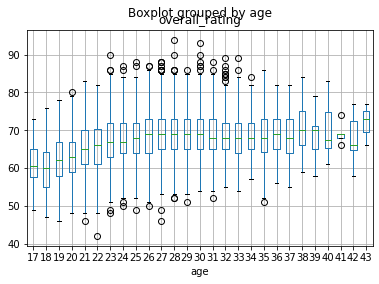

In [14]:
df.boxplot('overall_rating', by='age')

<AxesSubplot:title={'center':'overall_rating'}, xlabel='age_group'>

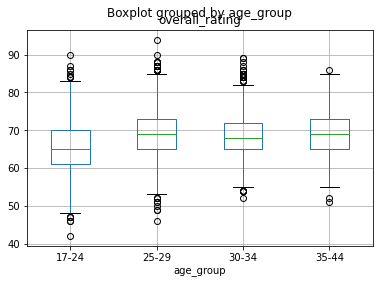

In [15]:
new_df.boxplot('overall_rating', by='age_group')

The boxplots above show a slight increase in overall rating as age increases.  We can assume that older players have played longer which may account for this.

In the grouped ages, the age group of 17-24 seems much lower but the others are around the same.  In order to see if there is significant difference we need to do an ANOVA test.

##### Can we use ANOVA?
Before performing an ANOVA test, three data conditions must be confirmed:

The observations are independent within and across groups. 
- yes

The data within each group is nearly normal.
- the boxplot shows that the data for each group is not strongly skewed, so we can assume in is nearly normal

Variability across the groups is about equal.
- not a big difference between standard deviations of each group

In [16]:
stats.f_oneway(age1['overall_rating'],
           age2['overall_rating'], 
            age3['overall_rating'],
             age4['overall_rating'])

F_onewayResult(statistic=193.8883320073073, pvalue=2.3739464476930166e-122)

##### Large F-value, and small p-value of 8.533 e-121

Identifying which group is different.


In [17]:
comp_age = mc.MultiComparison(new_df['overall_rating'], new_df['age_group'])
table, arr1, arr2 = comp_age.allpairtest(stats.ttest_ind, method='bonf')

table

group1,group2,stat,pval,pval_corr,reject
17-24,25-29,-21.3783,0.0,0.0,True
17-24,30-34,-17.0788,0.0,0.0,True
17-24,35-44,-12.1902,0.0,0.0,True
25-29,30-34,1.8739,0.061,0.366,False
25-29,35-44,0.4486,0.6537,1.0,False
30-34,35-44,-0.834,0.4044,1.0,False


##### Analysis
The youngest age group has a signigicantly different mean overall rating than each of the other 3 groups.  This could be explained both by the lack of data for these individuals (they have not been playing as long), as well as the impact of experience on a player's overall gameplay.

https://www.kaggle.com/code/jocelynallen/starter-european-soccer-database-5bfba1ad-d/data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
import sqlite3
import warnings
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

df = pd.read_csv(r'player.csv')
df.head()



,Unnamed: 0,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [5]:
df1 = pd.read_csv(r'player_attributes.csv')
#df1 = pd.read_sql_query("SELECT * FROM Player_Attributes", cnn)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           183978 non-null  int64  
 1   id                   183978 non-null  int64  
 2   player_fifa_api_id   183978 non-null  int64  
 3   player_api_id        183978 non-null  int64  
 4   date                 183978 non-null  object 
 5   overall_rating       183142 non-null  float64
 6   potential            183142 non-null  float64
 7   preferred_foot       183142 non-null  object 
 8   attacking_work_rate  180748 non-null  object 
 9   defensive_work_rate  183142 non-null  object 
 10  crossing             183142 non-null  float64
 11  finishing            183142 non-null  float64
 12  heading_accuracy     183142 non-null  float64
 13  short_passing        183142 non-null  float64
 14  volleys              181265 non-null  float64
 15  dribbling        

In [9]:
#merge datasets, remove dupliates

merged_df = pd.merge(df,df1,on='player_api_id',how= 'left')
merged_df = merged_df.drop_duplicates(subset ='player_api_id', keep = 'first')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 183968
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0_x          11060 non-null  int64  
 1   id_x                  11060 non-null  int64  
 2   player_api_id         11060 non-null  int64  
 3   player_name           11060 non-null  object 
 4   player_fifa_api_id_x  11060 non-null  int64  
 5   birthday              11060 non-null  object 
 6   height                11060 non-null  float64
 7   weight                11060 non-null  int64  
 8   Unnamed: 0_y          11060 non-null  int64  
 9   id_y                  11060 non-null  int64  
 10  player_fifa_api_id_y  11060 non-null  int64  
 11  date                  11060 non-null  object 
 12  overall_rating        11060 non-null  float64
 13  potential             11060 non-null  float64
 14  preferred_foot        11060 non-null  object 
 15  attacking_work_rat

In [10]:
#data exploration
merged_df.isnull().sum()

Unnamed: 0_x              0
id_x                      0
player_api_id             0
player_name               0
player_fifa_api_id_x      0
birthday                  0
height                    0
weight                    0
Unnamed: 0_y              0
id_y                      0
player_fifa_api_id_y      0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate     540
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                 478
dribbling                 0
curve                   478
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                 478
reactions                 0
balance                 478
shot_power                0
jumping                 478
stamina                   0
strength            

In [11]:
#remove empty values
merged_df = merged_df.dropna()
merged_df.isnull().sum()

Unnamed: 0_x            0
id_x                    0
player_api_id           0
player_name             0
player_fifa_api_id_x    0
birthday                0
height                  0
weight                  0
Unnamed: 0_y            0
id_y                    0
player_fifa_api_id_y    0
date                    0
overall_rating          0
potential               0
preferred_foot          0
attacking_work_rate     0
defensive_work_rate     0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interception

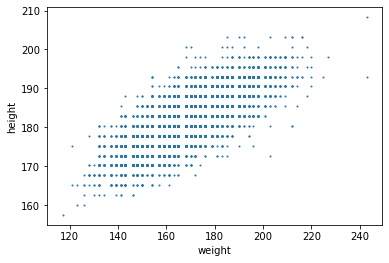

In [12]:
#scatter plot of weight and height to check for relationship 
merged_df.plot.scatter(x = 'weight', y = 'height', s = 1);

In [13]:
#checking co-variance of weight and height 
merged_df[['weight', 'height']].cov()

,weight,height
weight,225.790036,73.448142
height,73.448142,40.762310


In [14]:
#checking correlation of weight and height 
merged_df['weight'].corr(merged_df['height'])


0.7655949024428357

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

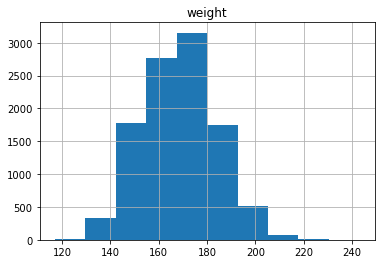

In [15]:
#checking distribution 
merged_df.hist(column='weight')


In [16]:
merged_df['weight'].describe()

count    10410.000000
mean       168.411239
std         15.026311
min        117.000000
25%        159.000000
50%        168.000000
75%        179.000000
max        243.000000
Name: weight, dtype: float64

array([[<AxesSubplot:title={'center':'height'}>]], dtype=object)

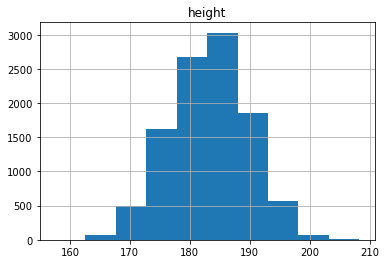

In [17]:
#checking distribution 
merged_df.hist(column='height')

In [18]:
#looking at stats of weigth and free kick accuracy
merged_df[['weight','free_kick_accuracy']].describe()

,weight,free_kick_accuracy
count,10410.000000,10410.000000
mean,168.411239,48.326993
std,15.026311,17.851263
min,117.000000,4.000000
25%,159.000000,35.000000
50%,168.000000,49.000000
75%,179.000000,62.000000
max,243.000000,94.000000


In [19]:
#looking at correlation and covariance of weight and free kick accuracy
merged_df['weight'].corr(merged_df['free_kick_accuracy'])

-0.3329591353173951

In [20]:
merged_df[['weight', 'free_kick_accuracy']].cov()

,weight,free_kick_accuracy
weight,225.790036,-89.312504
free_kick_accuracy,-89.312504,318.667587


array([[<AxesSubplot:title={'center':'free_kick_accuracy'}>]],
      dtype=object)

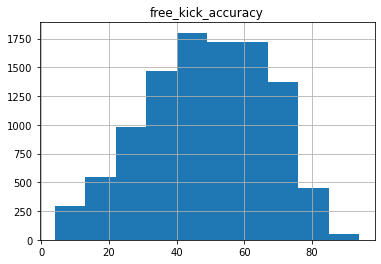

In [21]:
#looking at distribution of free kick accuracy, it isn't quite normal
merged_df.hist(column='free_kick_accuracy')



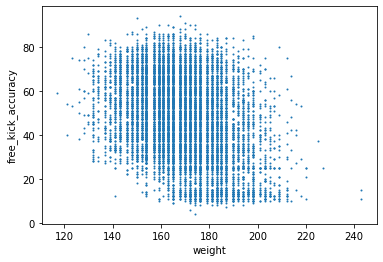

In [22]:
merged_df.plot.scatter(x = 'weight', y = 'free_kick_accuracy', s = 1);

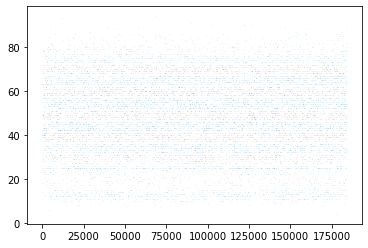

In [23]:

plt.scatter(merged_df.index, merged_df['free_kick_accuracy'], s=.001)

In [24]:
# transfrom non_normal distribution to the normal distribution 
free_kick_trans, lmbda = stats.boxcox(merged_df['free_kick_accuracy'])
print('Best lambda parameter = %s' % round(lmbda, 3))



Best lambda parameter = 1.076


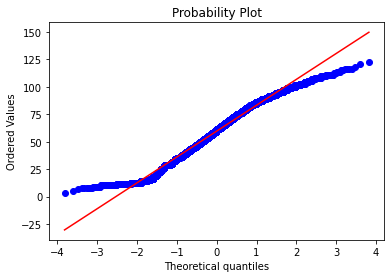

In [25]:
import pylab 
import matplotlib.pyplot as plt
stats.probplot(free_kick_trans, dist="norm", plot=pylab)
pylab.show()

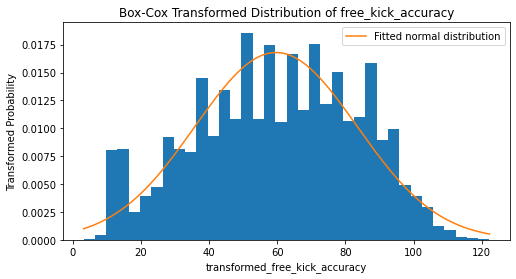

In [26]:
# fit Normal distribution
free_kick_trans.sort()
mean,std = stats.norm.fit(free_kick_trans, loc=0)
pdf_norm = stats.norm.pdf(free_kick_trans, mean, std)

# visual inspection
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(free_kick_trans, bins='auto', density=True)
ax.plot(free_kick_trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('transformed_free_kick_accuracy')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of free_kick_accuracy')
ax.legend();

merged_df['free_kick_accuracy_trans'] = free_kick_trans

In [27]:
#describtive stats of transfomred free kick accuracy
merged_df['free_kick_accuracy_trans'].describe()

count    10410.000000
mean        59.652999
std         23.747779
min          3.199785
25%         41.633941
50%         60.192702
75%         77.795250
max        122.237515
Name: free_kick_accuracy_trans, dtype: float64

array([[<AxesSubplot:title={'center':'free_kick_accuracy_trans'}>]],
      dtype=object)

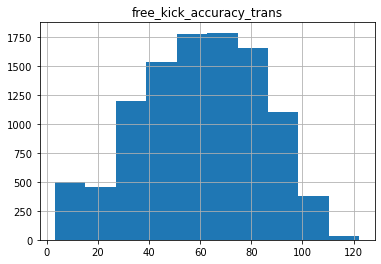

In [28]:
merged_df.hist(column='free_kick_accuracy_trans')

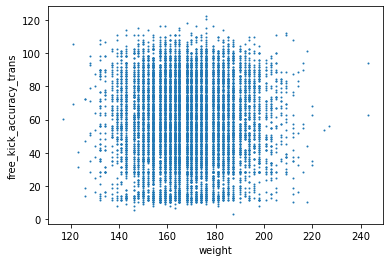

In [29]:
merged_df.plot.scatter(x = 'weight', y = 'free_kick_accuracy_trans', s = 1);

In [30]:
#creating linear regression model of non-transfored free kick accuracy
merged_df["Intercept"] = np.ones((len(merged_df),)) # statsmodels requires a column of 1's if you want an intercept

#set variables for regression
X = merged_df["weight"]
Y = merged_df["free_kick_accuracy"]

# Run the regression
result = sm.ols(formula='Y ~ X', data=merged_df).fit()

# Show the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     1298.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          6.41e-268
Time:                        19:02:24   Log-Likelihood:                -44161.
No. Observations:               10410   AIC:                         8.833e+04
Df Residuals:                   10408   BIC:                         8.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.9430      1.857     61.912      0.000     111.304     118.582
X             -0.3956      0.011    -36.024      0.000      -0.417      -0.374
==============================================================================
Omnibus:                      567.620   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.979
Skew:                          -0.039   Prob(JB):                     2.81e-48
Kurtosis:                       2.294   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

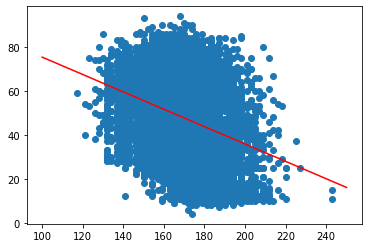

In [31]:
#plot the regresion line with the data
t = np.linspace(100, 250, 100)

intercept, slope = result.params

plt.scatter(x=merged_df["weight"], y=merged_df["free_kick_accuracy"])
plt.plot(t, intercept + slope *t, 'r-')

In [32]:
#creating linear regression model of transfored free kick accuracy

#set variables for regression
X = merged_df["weight"]
Y = merged_df["free_kick_accuracy_trans"]

# Run the regression
result = sm.ols(formula='Y ~ X', data=merged_df).fit()

# Show the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6767
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.411
Time:                        19:03:01   Log-Likelihood:                -47744.
No. Observations:               10410   AIC:                         9.549e+04
Df Residuals:                   10408   BIC:                         9.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.5069      2.619     21.956      0.000      52.373      62.641
X              0.0127      0.015      0.823      0.411      -0.018       0.043
==============================================================================
Omnibus:                      768.011   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.747
Skew:                          -0.148   Prob(JB):                     1.99e-63
Kurtosis:                       2.240   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

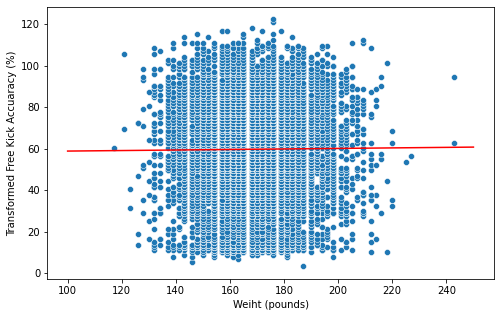

In [33]:
#plot the regresion line with the data
t = np.linspace(100, 250, 100)

intercept, slope = result.params

plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df,x='weight',y='free_kick_accuracy_trans')
plt.plot(t, intercept + slope *t, 'r-')
plt.xlabel('Weiht (pounds)') #x label
plt.ylabel('Transformed Free Kick Accuaracy (%)') #y label
plt.show()

count    1.041000e+04
mean    -1.135326e-13
std      2.374701e+01
min     -6.248781e+01
25%     -1.848519e+01
50%     -6.341474e-01
75%      1.789913e+01
max      5.669010e+01
Name: Residuals, dtype: float64

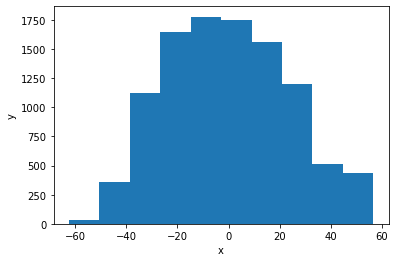

In [34]:
#calculate residuals values

# Predict y
merged_df['free_kick_accuracy_predicted_trans'] = intercept + slope * merged_df['weight']

#calculate residuals
merged_df['Residuals'] = merged_df['free_kick_accuracy_predicted_trans'] - merged_df['free_kick_accuracy_trans']

# Plot the histogram of the residuals 
merged_df_residuals_hist = plt.hist(merged_df['Residuals'])
plt.xlabel('x')
plt.ylabel('y')

# statistical summary of the residuals,
merged_df['Residuals'].describe()

In [72]:
#splitting wegiht in to three catagories for ANOVA
len(merged_df[merged_df['weight']>=175])

3363

In [73]:
len(merged_df[(merged_df['weight']>=163)&(merged_df['weight']<175)])


3450

In [74]:
len(merged_df[merged_df['weight']<163])

3597

In [75]:
merged_df['weight_category'] = np.where(merged_df['weight']<158, 'a)lower_163',
              np.where(merged_df['weight']<181, 'b)163_175',
              np.where(merged_df['weight']<245, 'c)higher_175','c)higher_175')))
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10410 entries, 0 to 183968
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0_x                        10410 non-null  int64  
 1   id_x                                10410 non-null  int64  
 2   player_api_id                       10410 non-null  int64  
 3   player_name                         10410 non-null  object 
 4   player_fifa_api_id_x                10410 non-null  int64  
 5   birthday                            10410 non-null  object 
 6   height                              10410 non-null  float64
 7   weight                              10410 non-null  int64  
 8   Unnamed: 0_y                        10410 non-null  int64  
 9   id_y                                10410 non-null  int64  
 10  player_fifa_api_id_y                10410 non-null  int64  
 11  date                                1041

In [76]:
merged_df[['weight_category','weight']]

,weight_category,weight
0,c)higher_175,187
5,a)lower_163,146
38,b)163_175,163
64,c)higher_175,198
87,a)lower_163,154
...,...,...
183895,b)163_175,159
183903,b)163_175,172
183924,b)163_175,168
183937,b)163_175,176


<Figure size 720x576 with 0 Axes>

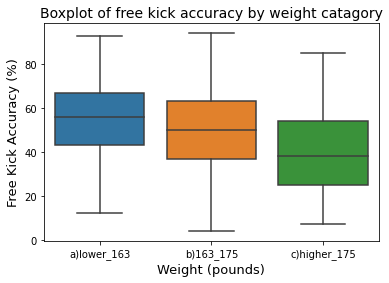

<Figure size 720x576 with 0 Axes>

In [77]:
#box plot of free kick accuracy versus weight catagories 
import seaborn as sns

sns.boxplot( x=merged_df["weight_category"], y=merged_df["free_kick_accuracy"],
           order=["a)lower_163","b)163_175","c)higher_175"])
plt.ylabel("Free Kick Accuracy (%)", size=13)
plt.xlabel("Weight (pounds)", size=13)
plt.title("Boxplot of free kick accuracy by weight catagory", size=14)

plt.figure(figsize=(10, 8))


In [78]:
merged_df.groupby('weight_category')['free_kick_accuracy'].describe()

,count,mean,std,min,25%,50%,75%,max
weight_category,,,,,,,,
a)lower_163,2500.0,54.677200,14.684606,12.0,43.0,56.0,67.0,93.0
b)163_175,5550.0,49.396757,17.180061,4.0,37.0,50.0,63.0,94.0
c)higher_175,2360.0,39.084322,18.774991,7.0,25.0,38.0,54.0,85.0


In [79]:
free_kick_accuracy_mean = merged_df['free_kick_accuracy'].mean()
free_kick_accuracy_count = merged_df['free_kick_accuracy'].count()
merged_df['free_kick_accuracy'].describe()


count    10410.000000
mean        48.326993
std         17.851263
min          4.000000
25%         35.000000
50%         49.000000
75%         62.000000
max         94.000000
Name: free_kick_accuracy, dtype: float64

In [85]:
#creating variables for anova test
mean_163_175 = merged_df.loc[merged_df['weight_category'] == 'b)163_175', 'free_kick_accuracy'].mean()
mean_lower_163 = merged_df.loc[merged_df['weight_category'] == 'a)lower_163', 'free_kick_accuracy'].mean()
mean_higher_175 = merged_df.loc[merged_df['weight_category'] == 'c)higher_175', 'free_kick_accuracy'].mean()
count_163_175 = merged_df.loc[merged_df['weight_category'] == 'b)163_175', 'free_kick_accuracy'].count()
count_lower_163 = merged_df.loc[merged_df['weight_category'] == 'a)lower_163', 'free_kick_accuracy'].count()
count_higher_175 = merged_df.loc[merged_df['weight_category'] == 'c)higher_175', 'free_kick_accuracy'].count()
std_163_175 = merged_df.loc[merged_df['weight_category'] == 'b)163_175', 'free_kick_accuracy'].std()
std_lower_163 = merged_df.loc[merged_df['weight_category'] == 'a)lower_163', 'free_kick_accuracy'].std()
std_higher_175 = merged_df.loc[merged_df['weight_category'] == 'c)higher_175', 'free_kick_accuracy'].std()

print(mean_163_175,mean_lower_163,mean_higher_175)
print(count_163_175,count_lower_163,count_higher_175)
print(std_163_175,std_lower_163,std_higher_175)

49.39675675675676 54.6772 39.0843220338983
5550 2500 2360
17.180061228248956 14.684606062883956 18.774991482771696


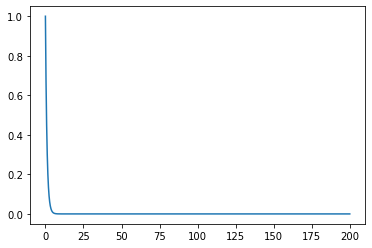

In [86]:
dfg = 3 - 1
dfe = 183142 - 3

F_dist = stats.f(dfg, dfe)
x = np.linspace(0, 200, 10000)

plt.plot(x, F_dist.pdf(x))

In [88]:
# calculate MSG and MSE and find the F-statistic for non-transformed data


MSG = (1/2)*(count_lower_163*(mean_lower_163-free_kick_accuracy_mean)**2+count_163_175*(mean_163_175-free_kick_accuracy_mean)**2+count_higher_175*(mean_higher_175-free_kick_accuracy_mean)**2)
MSE = (1/(free_kick_accuracy_count-3))*((count_lower_163-1)*std_lower_163**2+(count_163_175-1)*std_163_175**2 + (count_higher_175-1)*std_higher_175**2)

F = MSG/MSE

p_value = 1 - F_dist.cdf(F)

print('F-statistic: ', F)
print('p-value is ', p_value)

F-statistic:  534.0979568972995
p-value is  1.1102230246251565e-16


In [89]:
#creating variables for spicy stats anova for transformed data
array_158_181 = merged_df.loc[merged_df['weight_category'] == 'b) 158_181', 'free_kick_accuracy_trans']
array_lower_158 = merged_df.loc[merged_df['weight_category'] == 'a) lower_158', 'free_kick_accuracy_trans']
array_higher_181 = merged_df.loc[merged_df['weight_category'] == 'c) higher_181', 'free_kick_accuracy_trans']

fvalue, pvalue = stats.f_oneway(array_158_181, array_lower_158, array_higher_181)
print(fvalue,pvalue)

nan nan


In [90]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=merged_df['free_kick_accuracy_trans'],
                          groups=merged_df['weight_category'],
                          alpha=0.05)

#display results
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
a)lower_163    b)163_175   0.3381 0.8054 -1.0028  1.679  False
a)lower_163 c)higher_175   0.6565 0.5925 -0.9412 2.2543  False
  b)163_175 c)higher_175   0.3185 0.8314 -1.0496 1.6865  False
--------------------------------------------------------------


In [91]:
# Ordinary Least Squares (OLS) model
import statsmodels.stats.api as smapi

model = sm.ols('free_kick_accuracy_trans ~ C(weight_category)', data=merged_df).fit()
anova_table = smapi.anova_lm(model, typ=2)
anova_table



,sum_sq,df,F,PR(>F)
C(weight_category),5.242600e+02,2.0,0.464757,0.628301
Residual,5.869704e+06,10407.0,NaN,NaN


### Imports

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.multicomp as mc
from matplotlib import pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt

from typing import Any, List

#### Connecting to database

In [2]:
con = sqlite3.connect('database.sqlite')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

##### Custom-defined function to access df from table

In [3]:
def get_df_from_table(cnx: Any, table: str = ''):
    print(f"Reading {table} table...")
    query = cnx.execute(f"SELECT * FROM {table}")
    cols = [column[0] for column in query.description]
    df = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

    return df

#### Getting the necessary dfs from connection

In [4]:
player_attr_df = get_df_from_table(cnx = con, table=tables[1][0])
player_df = get_df_from_table(cnx = con, table=tables[2][0])

Reading Player_Attributes table...
Reading Player table...


#### Merging player_attr_df and player_df

In [5]:
overall_player_stats = pd.merge(player_df,player_attr_df,on='player_api_id',how= 'left')
overall_player_stats= overall_player_stats[['height','ball_control','heading_accuracy','sprint_speed', 'player_api_id', 'balance', 'free_kick_accuracy', 'overall_rating']]
overall_player_stats = overall_player_stats.dropna()
overall_player_stats = overall_player_stats.drop_duplicates(subset ='player_api_id', keep = 'first')

#### Sorting by height category

In [6]:
def get_height_category(height: float = 0.0):
    if height < 180:
        return "lower than 180cm"
    else:
        if height > 185:
            return "higher than 185cm"
        return "180-185cm"

overall_player_stats['height_category'] = overall_player_stats['height'].apply(get_height_category)

#### Grouping by height category

In [7]:
heading_accuracy = overall_player_stats.groupby(['height_category']).describe()['heading_accuracy']
display(heading_accuracy)

,count,mean,std,min,25%,50%,75%,max
height_category,,,,,,,,
180-185cm,3175.0,58.986772,13.383743,8.0,53.0,61.0,67.0,95.0
higher than 185cm,3771.0,57.651286,22.766712,8.0,53.0,66.0,73.0,93.0
lower than 180cm,3636.0,53.927668,10.498889,7.0,47.0,55.0,61.0,95.0


# OUTPUT FOR SPRINT SPEED

In [8]:
def get_player_stats(df, columns):
    return df[columns].groupby(['height_category']).agg({'mean'})

def show_scatter_splot(df: Any, columns: List = []):
    df1 = df[columns[0]].groupby("height_category").mean()
    df2 = df[columns[-1]].groupby("height_category").mean()

    print(df1)

    fig, ax = plt.subplots(1, 1, figsize = (5,5))
    ax.scatter(df1,df2)
    ax.set_ylabel(columns[0])
    ax.set_xlabel(columns[-1])
    for i, txt in enumerate(df1.index):
        ax.annotate(txt, (df1.loc[txt], df1.loc[txt]), ha='center')
    plt.show()

correlated_attributes = list(set(overall_player_stats.columns.tolist()) - set(['player_api_id']))
average_stats = overall_player_stats[correlated_attributes].groupby(['height_category']).agg({'mean'})

Height vs Sprint Speed

In [9]:
sprint_avg = get_player_stats(overall_player_stats, ['height_category', 'sprint_speed'])
display(sprint_avg)

,sprint_speed
,mean
height_category,
180-185cm,66.495748
higher than 185cm,57.791037
lower than 180cm,71.758801


# Transform sprint speed vs. height to normal distribution

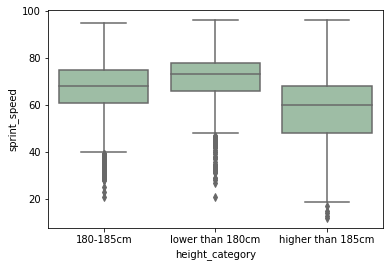

In [10]:
sprint_speed_norm, lmbda = st.boxcox(overall_player_stats['sprint_speed'])
heading_accuracy_norm, lmbda = st.boxcox(overall_player_stats['heading_accuracy'])
ax = sns.boxplot(x='height_category', y='sprint_speed', data=overall_player_stats, color='#99c2a2')

Best lambda parameter for sprint_speed = 1.91


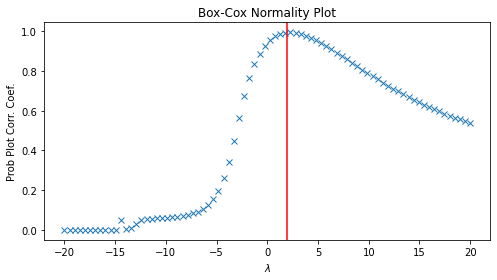

In [11]:
sprint_speed_norm.sort()
heading_accuracy_norm.sort()
overall_player_stats['sprint_speed_normalized'] = sprint_speed_norm
overall_player_stats['heading_accuracy_normalized'] = heading_accuracy_norm
print('Best lambda parameter for sprint_speed = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = st.boxcox_normplot(overall_player_stats['sprint_speed'], -20, 20, plot=ax)
ax.axvline(lmbda, color='r');

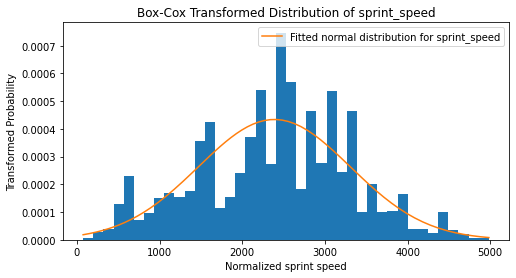

In [12]:
# fit Normal distribution
mean,std = st.norm.fit(sprint_speed_norm, loc=0)
pdf_norm = st.norm.pdf(sprint_speed_norm, mean, std)

# visual inspection
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(sprint_speed_norm, bins='auto', density=True)
ax.plot(sprint_speed_norm, pdf_norm, label='Fitted normal distribution for sprint_speed')
ax.set_xlabel('Normalized sprint speed')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of sprint_speed')
ax.legend();

#### Determine the F-value and P-value - Sprint Speed

In [13]:
st.f_oneway(overall_player_stats['sprint_speed_normalized'][overall_player_stats['height_category'] == 'lower than 180cm'],
            overall_player_stats['sprint_speed_normalized'][overall_player_stats['height_category'] == '180-185cm'],
            overall_player_stats['sprint_speed_normalized'][overall_player_stats['height_category'] == 'higher than 185cm'])

F_onewayResult(statistic=3.9291198458006935, pvalue=0.01968966769091579)

In [14]:
overall_player_stats.groupby('height_category')['sprint_speed_normalized'].describe()

,count,mean,std,min,25%,50%,75%,max
height_category,,,,,,,,
180-185cm,3175.0,2353.368592,932.346683,74.325899,1618.233566,2410.830965,3027.646988,4984.555877
higher than 185cm,3771.0,2415.240760,903.322469,209.404643,1739.301160,2484.059785,3027.646988,4984.555877
lower than 180cm,3636.0,2391.145376,924.119492,87.451712,1678.216431,2410.830965,3027.646988,4777.063407


#### Conducting the multicomparison test - Sprint Speed

In [15]:
# comparisons = mc.MultiComparison(overall_player_stats['heading_accuracy_normalized'], overall_player_stats['height_category'])
comparisons = mc.MultiComparison(overall_player_stats['sprint_speed_normalized'], overall_player_stats['height_category'])
sprint_speed_test, arr1, arr2 = comparisons.allpairtest(st.ttest_ind,method= 'bonf')
display(sprint_speed_test)

group1,group2,stat,pval,pval_corr,reject
180-185cm,higher than 185cm,-2.8022,0.0051,0.0153,True
180-185cm,lower than 180cm,-1.676,0.0938,0.2814,False
higher than 185cm,lower than 180cm,1.1348,0.2565,0.7695,False


Height vs Sprint Speed vs Heading Accuracy

In [16]:
sprint_heading_avg = get_player_stats(overall_player_stats, ['height_category', 'sprint_speed', 'heading_accuracy'])
display(sprint_heading_avg)

,sprint_speed,heading_accuracy
,mean,mean
height_category,,
180-185cm,66.495748,58.986772
higher than 185cm,57.791037,57.651286
lower than 180cm,71.758801,53.927668


                        mean
height_category             
180-185cm          66.495748
higher than 185cm  57.791037
lower than 180cm   71.758801


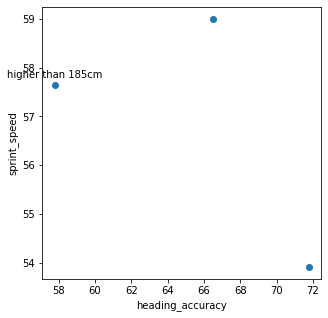

In [17]:
show_scatter_splot(df = average_stats, columns=['sprint_speed', 'heading_accuracy'])

Height vs Sprint Speed vs Ball Control

In [18]:
sprint_ball_ctrl_avg = get_player_stats(overall_player_stats, ['height_category', 'sprint_speed', 'ball_control'])
display(sprint_ball_ctrl_avg)

,sprint_speed,ball_control
,mean,mean
height_category,,
180-185cm,66.495748,64.217008
higher than 185cm,57.791037,54.065765
lower than 180cm,71.758801,68.920517


                        mean
height_category             
180-185cm          66.495748
higher than 185cm  57.791037
lower than 180cm   71.758801


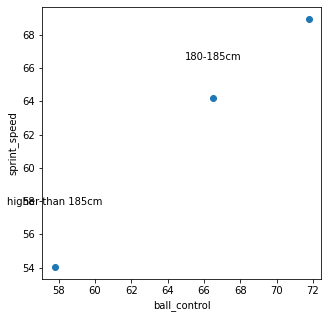

In [19]:
show_scatter_splot(df = average_stats, columns=['sprint_speed', 'ball_control'])

Height vs sprint speed vs greater balance

In [20]:
sprint_grt_balance_avg = get_player_stats(overall_player_stats, ['height_category', 'sprint_speed', 'balance'])
display(sprint_grt_balance_avg)

,sprint_speed,balance
,mean,mean
height_category,,
180-185cm,66.495748,64.781102
higher than 185cm,57.791037,51.697428
lower than 180cm,71.758801,75.258251


                        mean
height_category             
180-185cm          66.495748
higher than 185cm  57.791037
lower than 180cm   71.758801


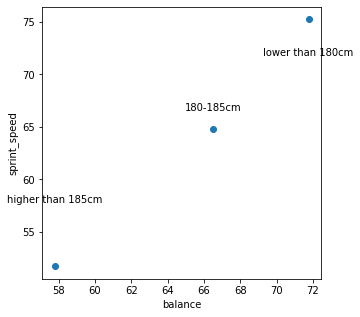

In [21]:
show_scatter_splot(df = average_stats, columns=['sprint_speed', 'balance'])

Height vs sprint speed vs kick accuracy

In [22]:
sprint_kick_accuracy_avg = get_player_stats(overall_player_stats, ['height_category', 'sprint_speed', 'free_kick_accuracy'])
display(sprint_kick_accuracy_avg)

,sprint_speed,free_kick_accuracy
,mean,mean
height_category,,
180-185cm,66.495748,49.883465
higher than 185cm,57.791037,39.546274
lower than 180cm,71.758801,55.941419


                        mean
height_category             
180-185cm          66.495748
higher than 185cm  57.791037
lower than 180cm   71.758801


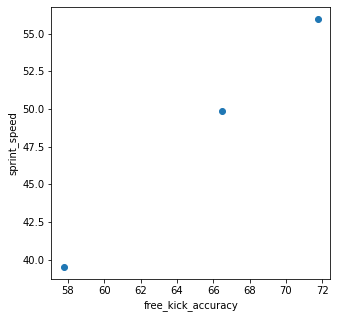

In [23]:
show_scatter_splot(df = average_stats, columns=['sprint_speed', 'free_kick_accuracy'])

Height vs sprint speed vs overall player rating

In [24]:
sprint_overall_rating_avg = get_player_stats(overall_player_stats, ['height_category', 'sprint_speed', 'overall_rating'])
display(sprint_overall_rating_avg)

,sprint_speed,overall_rating
,mean,mean
height_category,,
180-185cm,66.495748,67.771969
higher than 185cm,57.791037,68.357730
lower than 180cm,71.758801,68.094059


                        mean
height_category             
180-185cm          66.495748
higher than 185cm  57.791037
lower than 180cm   71.758801


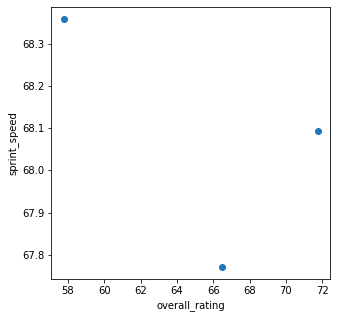

In [25]:
show_scatter_splot(df = average_stats, columns=['sprint_speed', 'overall_rating'])

Heatmap

<AxesSubplot:>

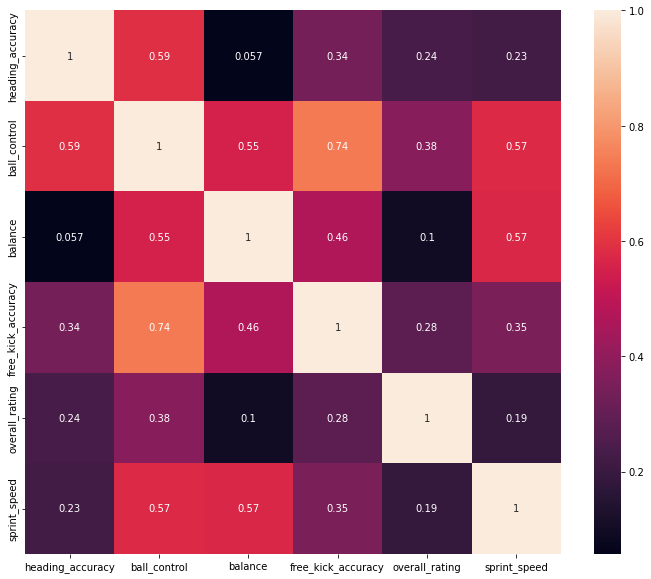

In [26]:
attr_to_plot = ['heading_accuracy', 'ball_control', 'balance', 'free_kick_accuracy', 'overall_rating', 'sprint_speed']

plt.figure(figsize = (12,10))
sns.heatmap(overall_player_stats[attr_to_plot].corr(), annot=True)

# Size of Correction = Interpretation

.90 to 1.00 (-.90 to -1.00) = Very high positive (negative) correlation

.70 to .90 (-.70 to -.90) = High positive (negative) correlation

.50 to .70 (-.50 to -.70) = Moderate positive (negative) correlation

.30 to .50 (-.30 to -.50) = Low positive (negative) correlation

.00 to .30 (00 to -.30) = Negligible correlation
